In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import mplcyberpunk
from pycaret.regression import *
from scipy.stats import skew
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

In [24]:

plt.style.use("cyberpunk")
pd.options.display.max_columns
pd.set_option('display.max_rows', 100)

## Documentation Reading
After reading the details of at the webpage, I found that, the column names are

    - WECs position {X1, X2, â€¦, X16; Y1, Y2,â€¦, Y16} continuous from 0 to 566 (m).
    - WECs absorbed power: {P1, P2, â€¦, P16}
    - Total power output of the farm: Powerall

    Farm-wide Performance: We will be analyzing the overall performance of the entire WEC farm, the target variable will be the total power output of the entire farm (Powerall).
Thus, giving names to each and every column

In [5]:
column_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'PowerAll']

In [6]:
adelaide = pd.read_csv("C:/Users/ALOK/Desktop/4th Sems/INT354_Ml1/WEC/WEC_1/Adelaide_Data.csv", names=column_names)

In [7]:
adelaide.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,PowerAll
0,316.5855,223.9277,182.3434,551.5497,7.8641,243.1339,361.0877,115.9284,78.6087,468.3799,...,82322.0277,98069.1011,86578.6330,93016.4133,63145.1829,98353.1952,80225.1390,98447.2846,97570.2225,1370374.145
1,530.3136,68.7031,31.5983,175.2582,516.1441,63.4652,67.0954,369.4486,14.0930,375.4462,...,83920.1033,80968.0044,87108.1328,68065.1856,99061.3812,77549.1426,99013.1628,78234.4337,84633.6493,1340929.765
2,27.3967,399.0488,565.6854,394.0466,120.2245,558.1293,546.4520,27.3256,314.1051,235.9476,...,97358.7395,93437.7170,69940.2554,92864.1192,60887.8095,72306.6556,81151.1515,83030.9726,94779.6131,1352031.511
3,346.1526,59.6375,226.2742,280.9095,402.2161,218.7181,207.0407,339.5676,0.0000,0.0000,...,80399.3841,89349.6141,85048.3860,70038.2271,92797.3569,97653.8121,74903.3740,71690.6549,96220.4768,1396754.375
4,317.9144,551.8542,335.4745,40.0240,316.6285,365.6434,416.3060,562.1028,211.3577,143.1255,...,97088.1761,81187.3982,63591.6729,92418.1977,82454.8256,97091.7749,85937.5437,66823.1572,93683.0996,1355708.577


In [8]:
adelaide.shape

(71999, 49)

In [9]:
adelaide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71999 entries, 0 to 71998
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        71999 non-null  float64
 1   X2        71999 non-null  float64
 2   X3        71999 non-null  float64
 3   X4        71999 non-null  float64
 4   X5        71999 non-null  float64
 5   X6        71999 non-null  float64
 6   X7        71999 non-null  float64
 7   X8        71999 non-null  float64
 8   X9        71999 non-null  float64
 9   X10       71999 non-null  float64
 10  X11       71999 non-null  float64
 11  X12       71999 non-null  float64
 12  X13       71999 non-null  float64
 13  X14       71999 non-null  float64
 14  X15       71999 non-null  float64
 15  X16       71999 non-null  float64
 16  Y1        71999 non-null  float64
 17  Y2        71999 non-null  float64
 18  Y3        71999 non-null  float64
 19  Y4        71999 non-null  float64
 20  Y5        71999 non-null  fl

In [10]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    return pd.concat([total, Percentage], axis = 1, keys = ['Total', 'Percentage'])

missing_data(adelaide)

,Total,Percentage
X1,0,0.0
Y10,0,0.0
Y12,0,0.0
Y13,0,0.0
Y14,0,0.0
Y15,0,0.0
Y16,0,0.0
P1,0,0.0
P2,0,0.0
P3,0,0.0


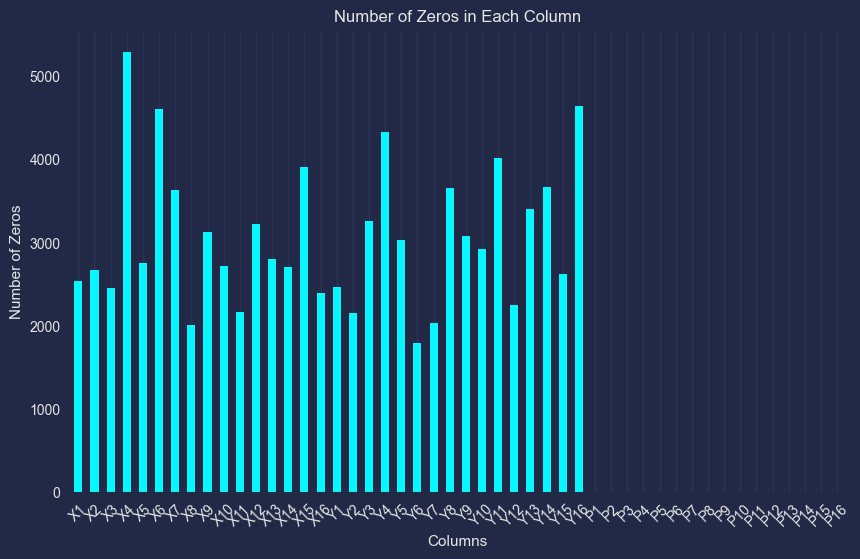

In [25]:
def plot_zeros_per_column(df):
    zero_counts = (df == 0).sum()
    zero_counts.plot(kind='bar', figsize=(10, 6))
    plt.title('Number of Zeros in Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Zeros')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

plot_zeros_per_column(adelaide)

In [12]:
def count_rows_with_all_zeros(df):
    all_zeros_mask = (df == 0).all(axis=1)
    num_rows_with_all_zeros = all_zeros_mask.sum()
    return num_rows_with_all_zeros

count_rows_with_all_zeros(adelaide)

0

## Inference
    - No null values in any column of the datasets
    - If zeros are considered as null, then we have a lot of zeros in every column, moreover there is no documentation to say zero should be considered null
    - No rows with all zeros in any column
    - No negative values in any column
     

In [13]:
def transform_col(df):
    skewed_cols = df.skew().abs() > 0.5
    for col in skewed_cols.index[skewed_cols]:
        df[col] = np.log1p(df[col])
    return df

In [14]:
adelaide = transform_col(adelaide)

In [15]:
def plot_hist_for_all_columns(df):
    num_cols = df.shape[1]
    num_rows = math.ceil(num_cols / 3)

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        ax = axes[i]
        sns.histplot(df[col], ax=ax, kde=True)
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('')

    plt.tight_layout()
    plt.show()

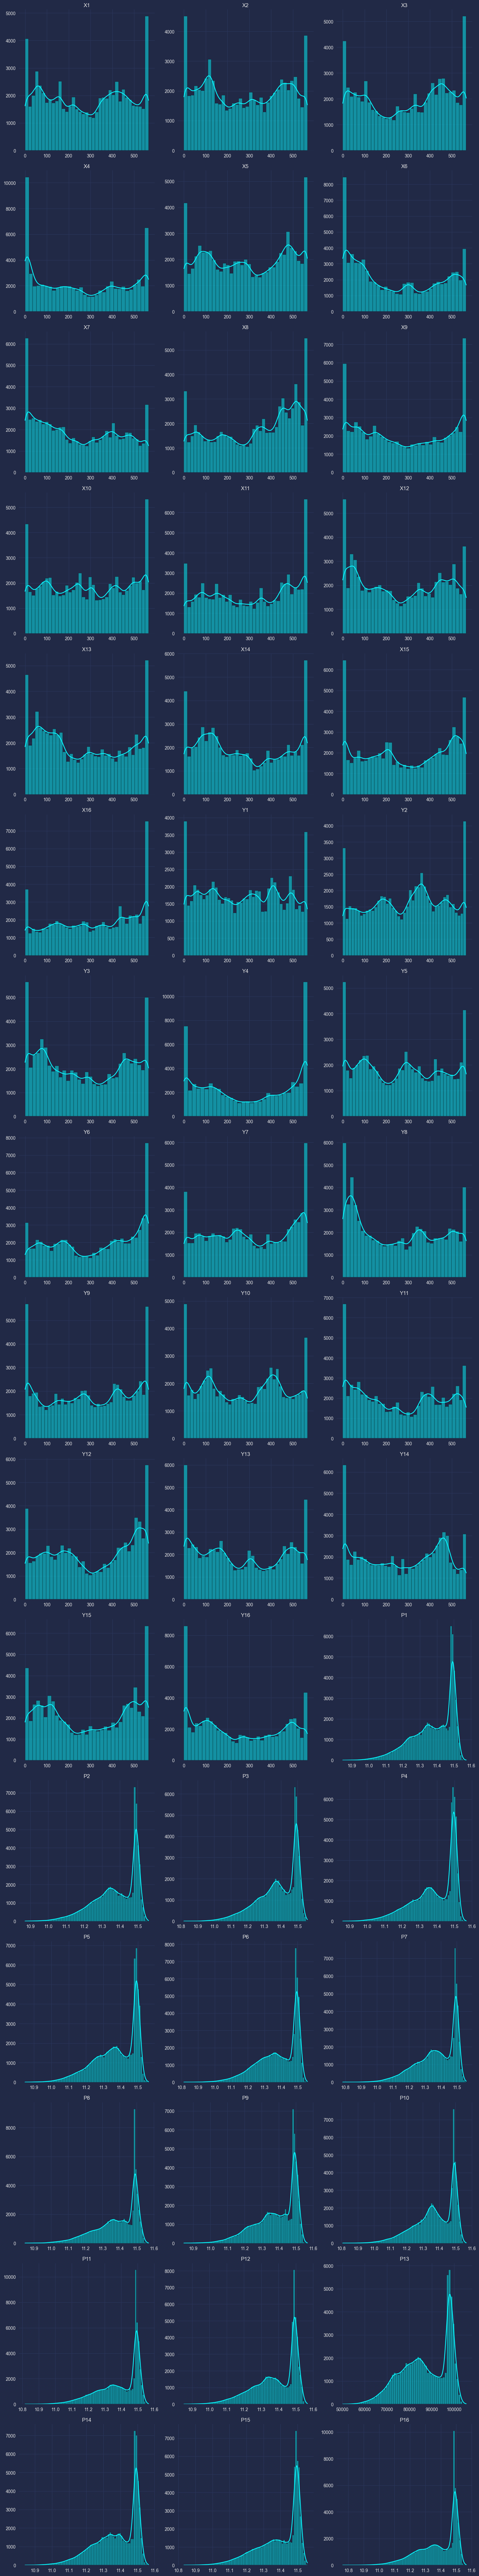

In [26]:
plot_hist_for_all_columns(adelaide)

## Scaling

In [17]:
scaler1 = StandardScaler()
scaler1.fit(adelaide)

StandardScaler()

## Splitting Data

In [18]:
target1 = adelaide['PowerAll']
adelaide.drop(columns=['PowerAll'], inplace = True)

## Modelling

In [19]:

_ = setup(data=pd.concat([adelaide, target1], axis=1), target = 'PowerAll')

,Description,Value
0,Session id,3903
1,Target,PowerAll
2,Target type,Regression
3,Original data shape,"(71999, 49)"
4,Transformed data shape,"(71999, 49)"
5,Transformed train set shape,"(50399, 49)"
6,Transformed test set shape,"(21600, 49)"
7,Numeric features,48
8,Preprocess,True
9,Imputation type,simple


In [20]:
best_models = compare_models(include=['lasso', 'ridge', 'lar', 'br'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,2116.0537,7431065.2500,2725.6812,0.9976,0.0020,0.0015,4.5490
ridge,Ridge Regression,2117.9855,7432777.5000,2726.0010,0.9976,0.0020,0.0015,0.1640
br,Bayesian Ridge,2148.3920,7685216.7500,2771.6359,0.9975,0.0020,0.0015,0.3280
lar,Least Angle Regression,8684.3206,287373241.2000,11041.7182,0.9079,0.0081,0.0062,0.2330


## Three Models performed nearly the same including

    - Lasso Regression (Accuracy : 99.76%)
    - Ridge Regression (Accuracy : 99.76%)
    - Bayesian Ridge (Accuracy : 99.76%)

We have used 10-Fold Cross Validation